<a href="https://colab.research.google.com/github/Evans-Sense/pet/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-20182021")

print("Path to dataset files:", path)

100%|██████████| 111M/111M [00:01<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3


In [3]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv


In [4]:
db = pd.read_csv('/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv')

db.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [5]:
db.shape

(5477006, 13)

In [6]:
db.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
db.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000
mean,4422029.023,54.038,53.244,4307.141,1.949,6.215,11.399,1.726,53.918,10.628,3.945
std,21507519.155,4.623,20.748,3308.050,1.039,4.957,6.536,1.082,33.353,9.792,4.558
min,-2144967296.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000
25%,1950000.000,53.378,37.778,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000
50%,2990000.000,55.171,43.068,2922.000,2.000,5.000,10.000,2.000,48.020,9.700,1.000
75%,4802000.000,56.226,65.649,6171.000,3.000,9.000,16.000,2.000,63.130,12.700,11.000
max,2147483647.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,7856.000,9999.000,11.000


In [8]:
db.isna().sum()

,0
price,0
date,0
time,0
geo_lat,0
geo_lon,0
region,0
building_type,0
level,0
levels,0
rooms,0


In [9]:
db.duplicated().sum()

np.int64(1523)

In [10]:
db = db.drop_duplicates()
db.shape

(5475483, 13)

In [11]:
db.drop('time', axis=1, inplace=True)

In [12]:
db.object_type = db.object_type.apply(lambda x: 2 if x == 11 else x)

In [13]:
db.rooms = db.rooms.apply(lambda x : 0 if x < 0 else x)

In [14]:
db.price = db.price.abs()

In [15]:
db.loc[db.level > db.levels, 'level'] = db.levels
db['level_to_levels'] = db.level / db.levels

db.drop('level', axis=1, inplace=True)
db.drop("levels", axis=1, inplace=True)

In [16]:
db.date = pd.to_datetime(db.date)
db['year'] = db['date'].dt.year
db['month'] = db['date'].dt.month
db.drop('date', axis=1, inplace=True)

In [17]:
db.head()

,price,geo_lat,geo_lon,region,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month
0,6050000,59.806,30.376,2661,1,3,82.600,10.800,1,0.800,2018,2
1,8650000,55.684,37.297,81,3,2,69.100,12.000,1,0.208,2018,2
2,4000000,56.295,44.062,2871,1,3,66.000,10.000,1,0.556,2018,2
3,1850000,44.996,39.075,2843,4,2,38.000,5.000,2,0.750,2018,3
4,5450000,55.919,37.985,81,3,2,60.000,10.000,1,0.929,2018,3


In [18]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область',
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область',
    '4417': 'Республика Коми',
    '5282': 'Челябинская область',
    '5368': 'Иркутская область',
    '5520': 'Пермский край',
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [19]:
db['region'] = db.region.astype(str)
db['region_name'] = db['region'].map(region_name)
db.drop('region', axis=1, inplace=True)
db.head()

,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,region_name
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,Санкт-Петербург
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,Московская область
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,Нижегородская область
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,Краснодарский край
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,Московская область


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

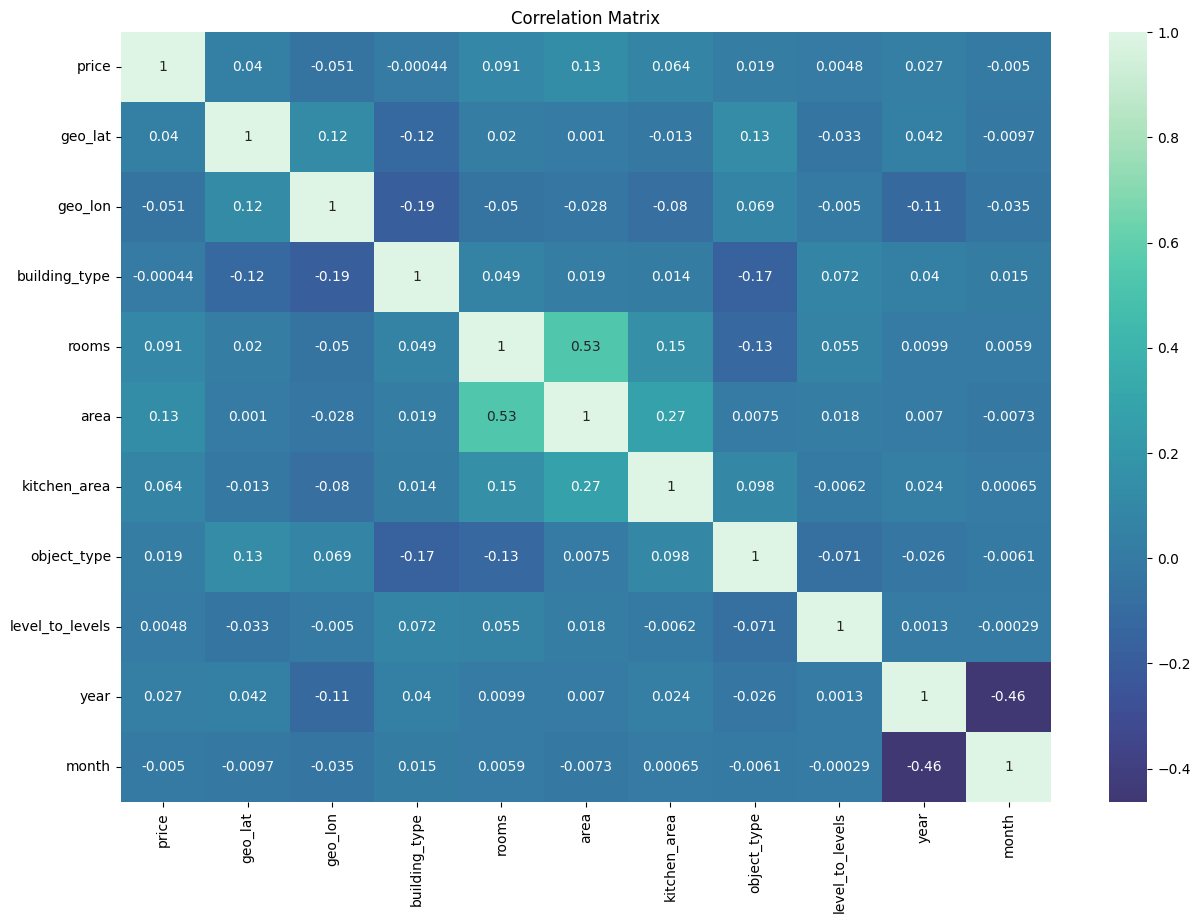

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(db.corr(numeric_only=True), center=0, cmap='mako', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
db['enc_reg'] = encoder.fit_transform(db[['region_name']])
db.drop('region_name', axis=1, inplace=True)
db.head()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,enc_reg
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,62
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,30
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,33
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,22
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,30


In [23]:
from sklearn.model_selection import train_test_split
X = db.drop('price', axis=1)
Y = db['price']
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4380386, 11), (1095097, 11), (4380386,), (1095097,))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Переходим к обучению моделей

In [ ]:
from sklearn.metrics import *
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=300, logging_level='Silent')
clf.fit(X_train, y_train)
plot_surface(X_test, y_test, clf)

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))